In [21]:
from selenium import webdriver
import time
import pandas as pd
import os

In [32]:
from bs4 import BeautifulSoup
import requests

In [26]:
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service

In [126]:
service = Service('C:/Users/DELL/Downloads/Compressed/chromedriver-win64/chromedriver.exe')
driver = webdriver.Chrome(service=service)
options = webdriver.ChromeOptions()
options.add_argument('--start-maximized')
driver = webdriver.Chrome(service=service, options=options)
# driver.get(url)
# time.sleep(5)
try:
    url = 'https://www.linkedin.com/jobs/search/?currentJobId=3961498818&f_E=1%2C2&f_TPR=r2592000&geoId=106155005&keywords=data%20analyst&origin=JOB_SEARCH_PAGE_JOB_FILTER&refresh=true'
    driver.get(url)
    for i in range(3):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(5)

except Exception as e:
    print(f"Error extracting job details: {e}")

In [142]:
# jobs = driver.find_elements(By.CLASS_NAME, 'jobs-search__results-list')
jobs = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'base-search-card__info')))

In [143]:
jobs

[<selenium.webdriver.remote.webelement.WebElement (session="f1a7d86d035bc75e5106b776176128cf", element="f.1D2B4AB2A78A7C1683ECE46907DA96EE.d.A2046089E6115DE14B85EE970FAB4FA9.e.183")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f1a7d86d035bc75e5106b776176128cf", element="f.1D2B4AB2A78A7C1683ECE46907DA96EE.d.A2046089E6115DE14B85EE970FAB4FA9.e.188")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f1a7d86d035bc75e5106b776176128cf", element="f.1D2B4AB2A78A7C1683ECE46907DA96EE.d.A2046089E6115DE14B85EE970FAB4FA9.e.192")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f1a7d86d035bc75e5106b776176128cf", element="f.1D2B4AB2A78A7C1683ECE46907DA96EE.d.A2046089E6115DE14B85EE970FAB4FA9.e.713")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f1a7d86d035bc75e5106b776176128cf", element="f.1D2B4AB2A78A7C1683ECE46907DA96EE.d.A2046089E6115DE14B85EE970FAB4FA9.e.734")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f1a7d86d035bc75e5106

In [144]:
job_data = []
for job in jobs:
    try:
        title_element = job.find_element(By.CLASS_NAME, 'base-search-card__title')
        company_element = job.find_element(By.CLASS_NAME, 'base-search-card__subtitle')
        location_element = job.find_element(By.CLASS_NAME, 'job-search-card__location')

        title = title_element.text
        company = company_element.text
        location = location_element.text

        job_data.append({
            'title': title,
            'company': company,
            'location': location
        })
    except Exception as e:
        print(f"Error extracting job details: {e}")

In [145]:
for job in job_data:
    print(f"Title: {job['title']}, Company: {job['company']}, Location: {job['location']}")

Title: Reporting And Advanced Analytics Analyst, Company: Henkel, Location: Cairo, Cairo, Egypt
Title: Graduate Data Analyst/Scientist, Company: Skill Farm, Location: Cairo, Cairo, Egypt
Title: Data Analyst, Company: R4S Recruitment, Location: Egypt
Title: Data Analyst, Company: Infomineo, Location: Cairo, Egypt
Title: Data Management Engineer (Data Visualization), Company: e-finance, Location: Giza, Al Jizah, Egypt
Title: Data Engineer I, Company: Breadfast, Location: Cairo, Cairo, Egypt
Title: Business Intelligence Analyst, Company: Nalco Water, An Ecolab Company, Location: Cairo, Cairo, Egypt
Title: IT Support Analyst, Company: WPP, Location: Cairo, Cairo, Egypt
Title: Data Engineer II, Company: Breadfast, Location: Cairo, Cairo, Egypt
Title: Marketing Data Analyst, Company: Canonical, Location: Cairo, Cairo, Egypt
Title: Marketing Data Analyst, Company: Canonical, Location: Cairo, Cairo, Egypt
Title: Remote Python Data Science Analyst, Company: Turing, Location: Egypt
Title: Remote

In [146]:
job_data

[{'title': 'Reporting And Advanced Analytics Analyst',
  'company': 'Henkel',
  'location': 'Cairo, Cairo, Egypt'},
 {'title': 'Graduate Data Analyst/Scientist',
  'company': 'Skill Farm',
  'location': 'Cairo, Cairo, Egypt'},
 {'title': 'Data Analyst', 'company': 'R4S Recruitment', 'location': 'Egypt'},
 {'title': 'Data Analyst', 'company': 'Infomineo', 'location': 'Cairo, Egypt'},
 {'title': 'Data Management Engineer (Data Visualization)',
  'company': 'e-finance',
  'location': 'Giza, Al Jizah, Egypt'},
 {'title': 'Data Engineer I',
  'company': 'Breadfast',
  'location': 'Cairo, Cairo, Egypt'},
 {'title': 'Business Intelligence Analyst',
  'company': 'Nalco Water, An Ecolab Company',
  'location': 'Cairo, Cairo, Egypt'},
 {'title': 'IT Support Analyst',
  'company': 'WPP',
  'location': 'Cairo, Cairo, Egypt'},
 {'title': 'Data Engineer II',
  'company': 'Breadfast',
  'location': 'Cairo, Cairo, Egypt'},
 {'title': 'Marketing Data Analyst',
  'company': 'Canonical',
  'location': 'C

In [147]:
df = pd.DataFrame(job_data)
df

,title,company,location
0,Reporting And Advanced Analytics Analyst,Henkel,"Cairo, Cairo, Egypt"
1,Graduate Data Analyst/Scientist,Skill Farm,"Cairo, Cairo, Egypt"
2,Data Analyst,R4S Recruitment,Egypt
3,Data Analyst,Infomineo,"Cairo, Egypt"
4,Data Management Engineer (Data Visualization),e-finance,"Giza, Al Jizah, Egypt"
...,...,...,...
65,Risk & Quality - Information Security Analyst-...,PwC Middle East,"Cairo, Cairo, Egypt"
66,Oracle (Forms & Reports) Developer,IT-Fusion Software House,"Qesm El Maadi, Cairo, Egypt"
67,Remote Python Analyst,Turing,Egypt
68,IAM Engineer,Orange Egypt,"Cairo, Cairo, Egypt"


In [186]:
new_df = df.rename(columns={'title': 'Title', 'company': 'Company', 'location': 'Location'}, inplace=False)
new_df

,Title,Company,Location
0,Reporting And Advanced Analytics Analyst,Henkel,"Cairo, Cairo, Egypt"
1,Graduate Data Analyst/Scientist,Skill Farm,"Cairo, Cairo, Egypt"
2,Data Analyst,R4S Recruitment,Egypt
3,Data Analyst,Infomineo,"Cairo, Egypt"
4,Data Management Engineer (Data Visualization),e-finance,"Giza, Al Jizah, Egypt"
...,...,...,...
65,Risk & Quality - Information Security Analyst-...,PwC Middle East,"Cairo, Cairo, Egypt"
66,Oracle (Forms & Reports) Developer,IT-Fusion Software House,"Qesm El Maadi, Cairo, Egypt"
67,Remote Python Analyst,Turing,Egypt
68,IAM Engineer,Orange Egypt,"Cairo, Cairo, Egypt"


In [162]:
# new_df = df.style.set_properties(**{'text-align': 'left'})
# new_df

In [156]:
df.to_csv('data.csv', index=False)
df = pd.read_csv("data.csv")

In [158]:
df.rename(columns={'title': 'Title', 'company': 'Company', 'location': 'Location'}, inplace=False)

,Title,Company,Location
0,Reporting And Advanced Analytics Analyst,Henkel,"Cairo, Cairo, Egypt"
1,Graduate Data Analyst/Scientist,Skill Farm,"Cairo, Cairo, Egypt"
2,Data Analyst,R4S Recruitment,Egypt
3,Data Analyst,Infomineo,"Cairo, Egypt"
4,Data Management Engineer (Data Visualization),e-finance,"Giza, Al Jizah, Egypt"
...,...,...,...
65,Risk & Quality - Information Security Analyst-...,PwC Middle East,"Cairo, Cairo, Egypt"
66,Oracle (Forms & Reports) Developer,IT-Fusion Software House,"Qesm El Maadi, Cairo, Egypt"
67,Remote Python Analyst,Turing,Egypt
68,IAM Engineer,Orange Egypt,"Cairo, Cairo, Egypt"


In [176]:
new_df.to_csv('data.csv', index=False)


In [187]:
new_df

,Title,Company,Location
0,Reporting And Advanced Analytics Analyst,Henkel,"Cairo, Cairo, Egypt"
1,Graduate Data Analyst/Scientist,Skill Farm,"Cairo, Cairo, Egypt"
2,Data Analyst,R4S Recruitment,Egypt
3,Data Analyst,Infomineo,"Cairo, Egypt"
4,Data Management Engineer (Data Visualization),e-finance,"Giza, Al Jizah, Egypt"
...,...,...,...
65,Risk & Quality - Information Security Analyst-...,PwC Middle East,"Cairo, Cairo, Egypt"
66,Oracle (Forms & Reports) Developer,IT-Fusion Software House,"Qesm El Maadi, Cairo, Egypt"
67,Remote Python Analyst,Turing,Egypt
68,IAM Engineer,Orange Egypt,"Cairo, Cairo, Egypt"


In [165]:
import matplotlib.pyplot as plt

In [188]:
new_df[['City','Governorate', 'Country']] = new_df.Location.str.split(",", expand=True)

In [189]:
new_df

,Title,Company,Location,City,Governorate,Country
0,Reporting And Advanced Analytics Analyst,Henkel,"Cairo, Cairo, Egypt",Cairo,Cairo,Egypt
1,Graduate Data Analyst/Scientist,Skill Farm,"Cairo, Cairo, Egypt",Cairo,Cairo,Egypt
2,Data Analyst,R4S Recruitment,Egypt,Egypt,None,None
3,Data Analyst,Infomineo,"Cairo, Egypt",Cairo,Egypt,None
4,Data Management Engineer (Data Visualization),e-finance,"Giza, Al Jizah, Egypt",Giza,Al Jizah,Egypt
...,...,...,...,...,...,...
65,Risk & Quality - Information Security Analyst-...,PwC Middle East,"Cairo, Cairo, Egypt",Cairo,Cairo,Egypt
66,Oracle (Forms & Reports) Developer,IT-Fusion Software House,"Qesm El Maadi, Cairo, Egypt",Qesm El Maadi,Cairo,Egypt
67,Remote Python Analyst,Turing,Egypt,Egypt,None,None
68,IAM Engineer,Orange Egypt,"Cairo, Cairo, Egypt",Cairo,Cairo,Egypt


In [198]:
# l = new_df.Company.duplicated().sum()
# l
new_df2 = new_df.pivot_table(index = ['Company'], aggfunc ='size')

new_df2

Company
Affectiva                             2
Ajwa for Food Industries Co Egypt     1
Al Ahram Beverages Company            1
Bayantech                             1
Breadfast                             2
Canonical                             7
DXC Technology                        1
ELSEWEDY ELECTRIC                     1
Henkel                                2
IST Networks                          1
IT-Fusion Software House              2
Infomineo                             1
MaxAB                                 1
Nalco Water, An Ecolab Company        1
Naseej                                1
Network International                 2
Orange Egypt                          2
PwC Middle East                       2
R4S Recruitment                       1
Skill Farm                            1
Squadio                               1
Suplyd                                2
Turing                               29
Valeo                                 2
WPP                             

In [218]:
new_df.drop('count', axis=1, inplace=True)

In [219]:
new_df['Count'] = new_df.groupby('Company')['Company'].transform('count')

In [220]:
new_df

,Title,Company,Location,City,Governorate,Country,Count
0,Reporting And Advanced Analytics Analyst,Henkel,"Cairo, Cairo, Egypt",Cairo,Cairo,Egypt,2
1,Graduate Data Analyst/Scientist,Skill Farm,"Cairo, Cairo, Egypt",Cairo,Cairo,Egypt,1
2,Data Analyst,R4S Recruitment,Egypt,Egypt,None,None,1
3,Data Analyst,Infomineo,"Cairo, Egypt",Cairo,Egypt,None,1
4,Data Management Engineer (Data Visualization),e-finance,"Giza, Al Jizah, Egypt",Giza,Al Jizah,Egypt,1
...,...,...,...,...,...,...,...
65,Risk & Quality - Information Security Analyst-...,PwC Middle East,"Cairo, Cairo, Egypt",Cairo,Cairo,Egypt,2
66,Oracle (Forms & Reports) Developer,IT-Fusion Software House,"Qesm El Maadi, Cairo, Egypt",Qesm El Maadi,Cairo,Egypt,2
67,Remote Python Analyst,Turing,Egypt,Egypt,None,None,29
68,IAM Engineer,Orange Egypt,"Cairo, Cairo, Egypt",Cairo,Cairo,Egypt,2


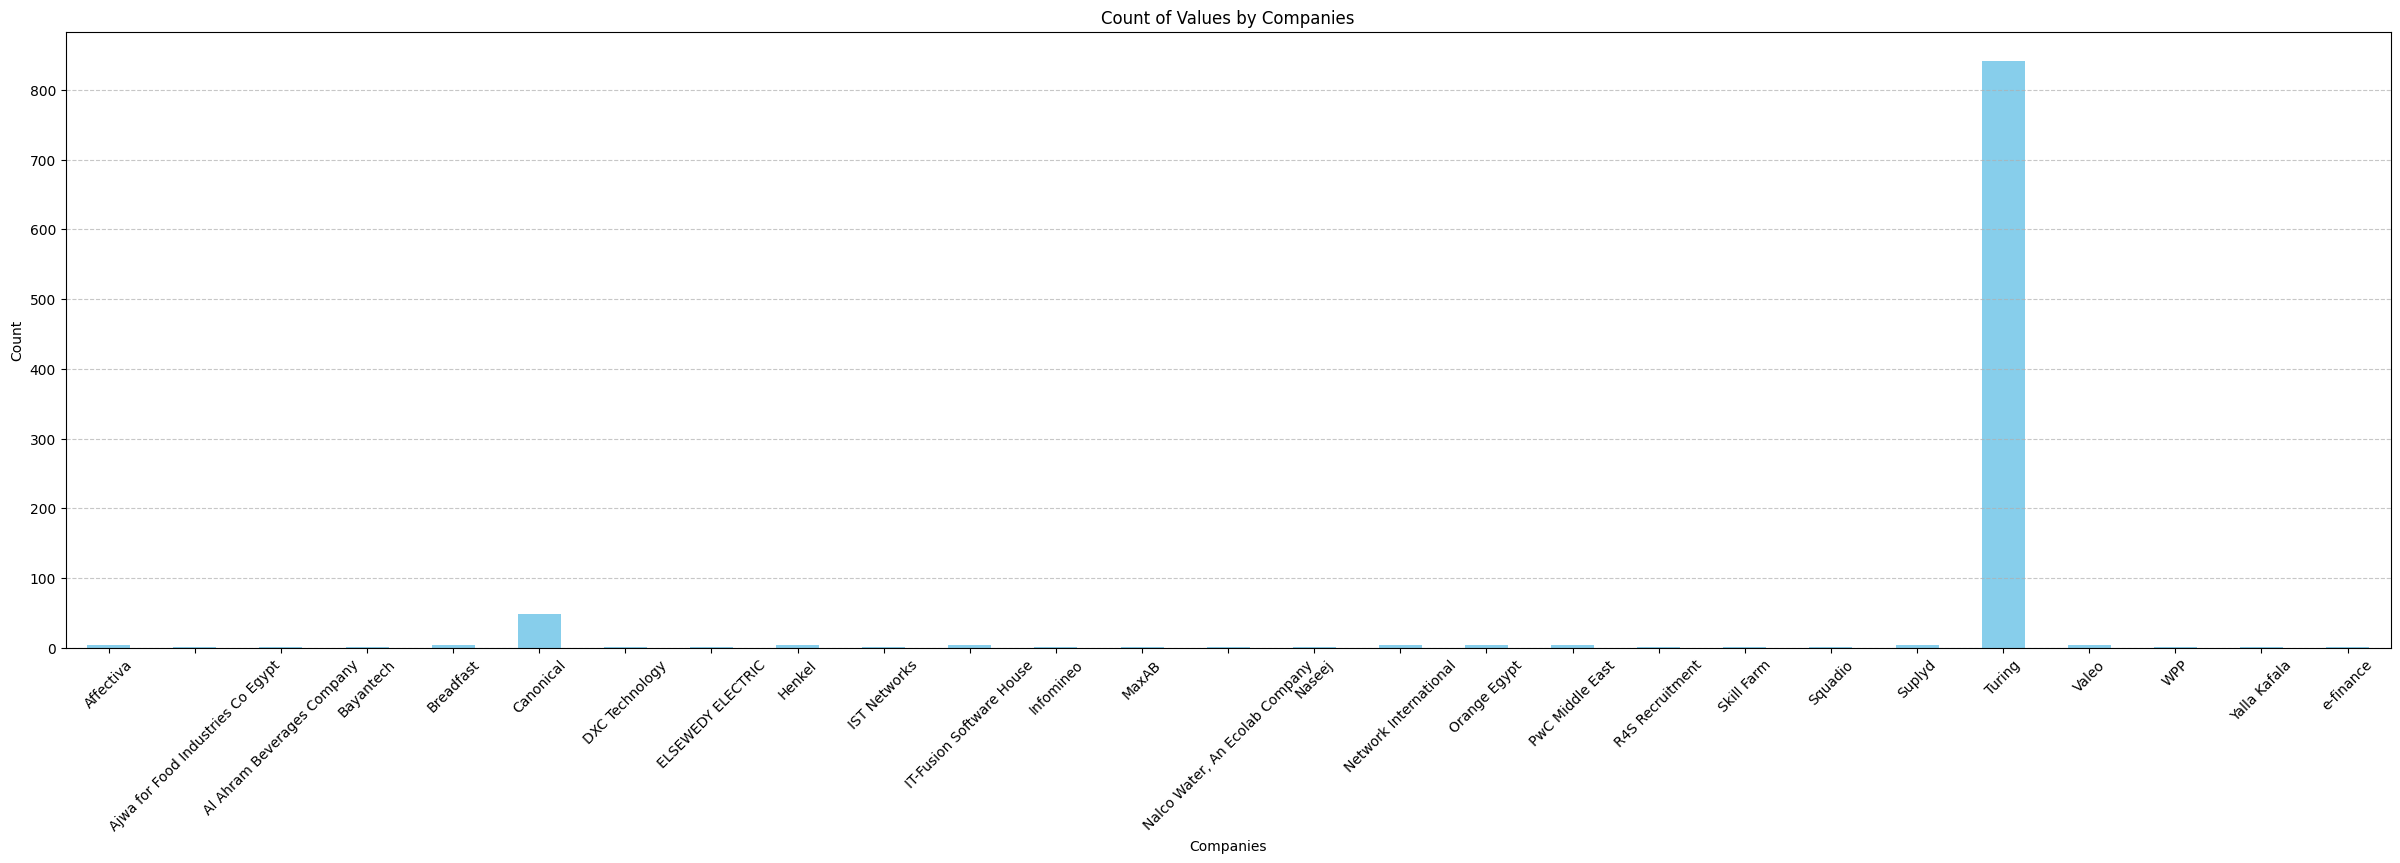

In [227]:
counts = new_df['Count'].groupby(new_df['Company']).sum()

plt.figure(figsize=(30, 8))
counts.plot(kind='bar', color='skyblue')
plt.title('Count of Values by Companies')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

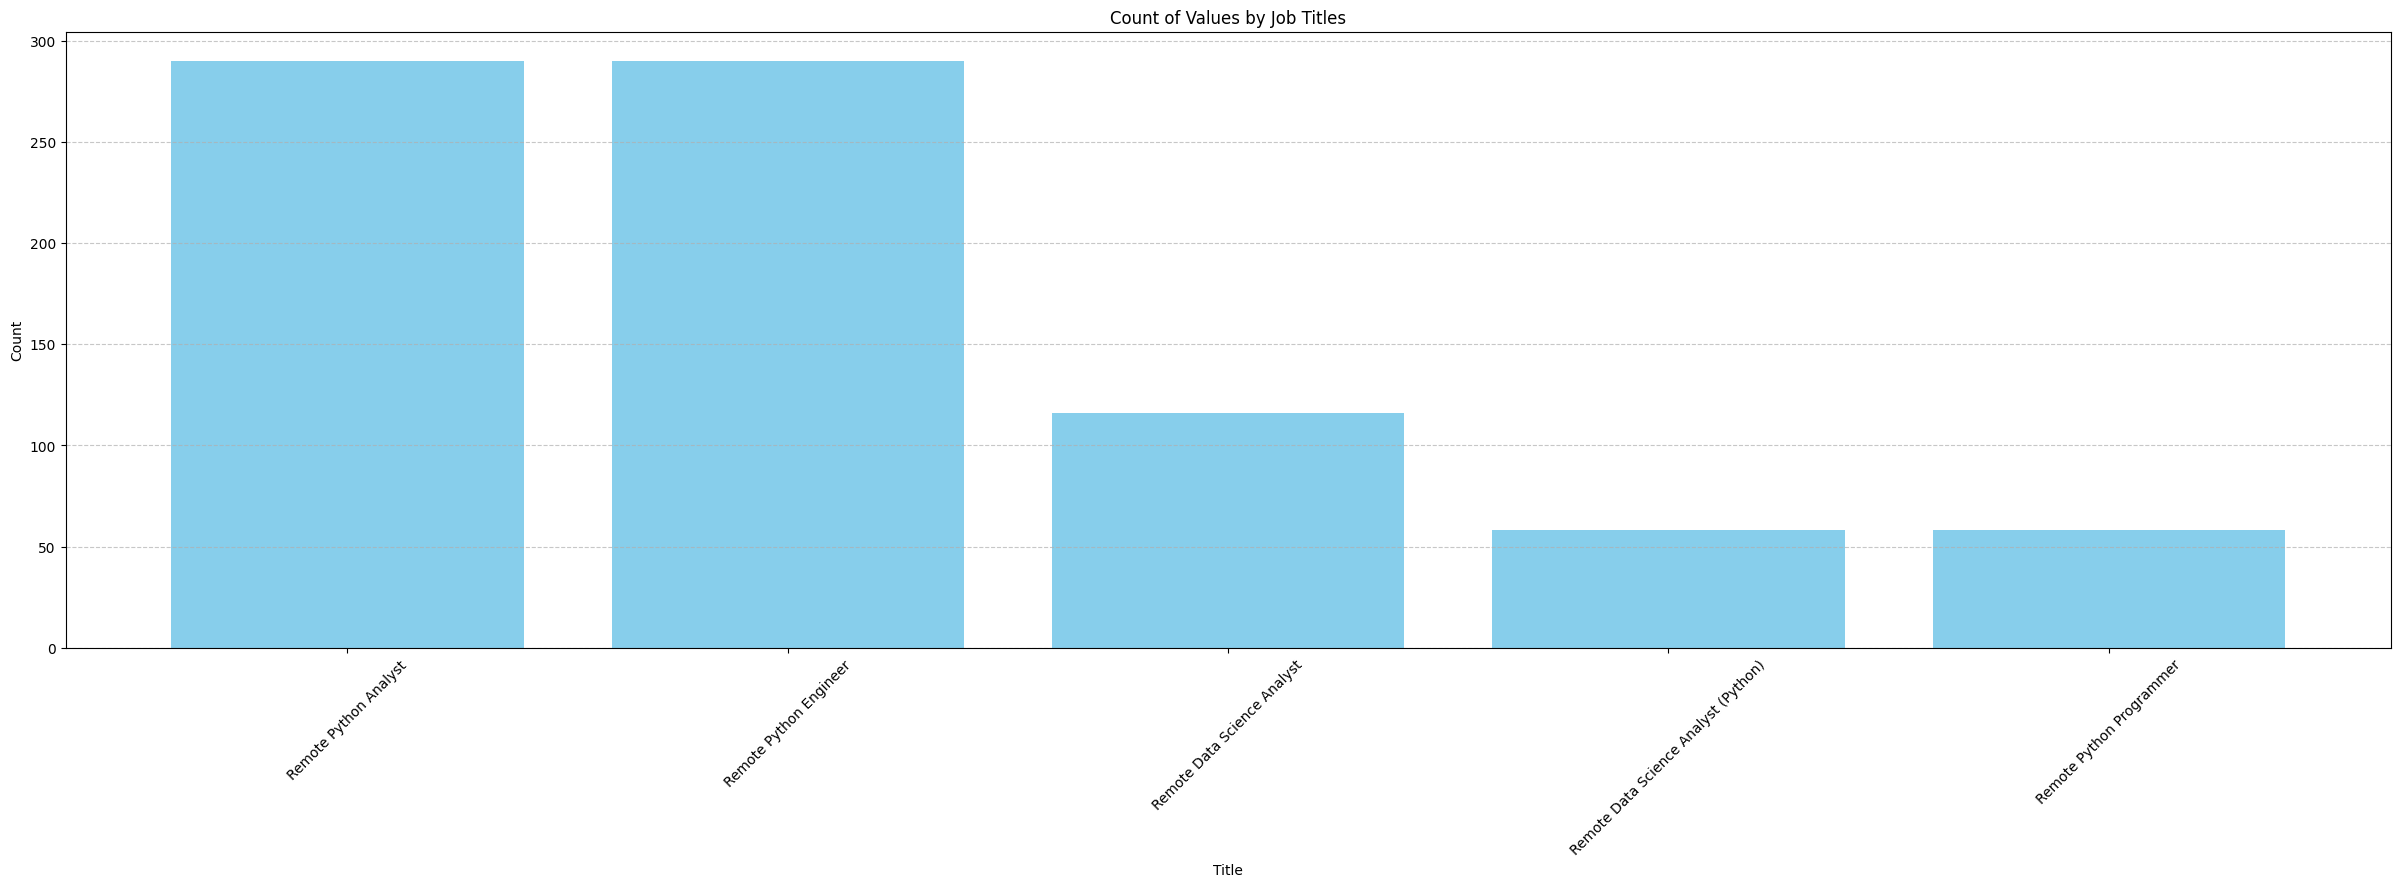

In [229]:
counts = new_df['Count'].groupby(new_df['Title']).sum()
top_five = counts.sort_values(ascending=False).head(5)

plt.figure(figsize=(30, 8))
# counts.plot(kind='bar', color='skyblue')
plt.bar(top_five.index, top_five.values, color='skyblue')
plt.title('Count of Values by Job Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()